In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, plot_confusion_matrix
from sklearn import set_config
set_config(display='diagram')

# Predicting House Prices

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/kc_house_data.csv'
sales = pd.read_csv(url, index_col='id')
sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


This dataset contains house sale prices for King County, which includes Seattle. 
It includes homes sold between May 2014 and May 2015.

There are 21 columns:

| Column | Description |
| :- | -: |
| id | Unique ID for each home sold |
| date | Date of the home sale |
| price | Price of each home sold |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms, where .5 accounts for a room with a toilet but no shower |
| sqft_living | Square footage of the apartments interior living space |
| sqft_lot | Square footage of the land space |
| floors | Number of floors |
| waterfront | A dummy variable for whether the apartment was overlooking the waterfront or not |
| view | An index from 0 to 4 of how good the view of the property was |
| condition | An index from 1 to 5 on the condition of the apartment |
| grade | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design |
| sqft_above | The square footage of the interior housing space hat is above ground level |
| sqft_basement | The square footage of the interior housing space that is below ground level |
| yr_built | The year the house was initially built |
| yr_renovated | The year of the house's last renovation |
| zipcode | What zipcode area the house is in |
| lat | Latitude |
| long | Longitude |
| sqft_living15 | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15 | The square footage of the land lots of the nearest 15 neighbors |

Your **goal** is to **train** a regression pipeline that predicts house prices, **tune** the pipeline hyperparameters, and **test** its performance.

In [3]:
X=sales.drop(['price','date','lat','long'],axis=1)
y=sales.price

In [4]:
X_train,X_test,y_train,y_test= train_test_split(X,y)

In [5]:
pipe= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler()),
    ('reg',RandomForestRegressor())
])

In [6]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('reg', RandomForestRegressor())])

In [7]:
prarams_dic={'reg__min_samples_leaf':[1,2,4,8],
            'reg__max_depth':[2,5,10]}

In [10]:
grid=GridSearchCV(pipe,
                  prarams_dic,
                  cv=10,
                  scoring='neg_root_mean_squared_error',
                  n_jobs=-1,verbose=1)

In [11]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('reg', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'reg__max_depth': [2, 5, 10],
                         'reg__min_samples_leaf': [1, 2, 4, 8]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [12]:
grid.best_score_

-170657.47862634223

In [13]:
best_clf=grid.best_estimator_

In [14]:
best_clf.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('reg', RandomForestRegressor(max_depth=10))])

In [15]:
y_test_pred=best_clf.predict(X_test)

In [18]:
price_pred=best_clf.predict(X)

In [16]:
accuracy_score=(y_test,y_test_pred)

**Plot** the observed prices against the predicted prices.

In [19]:
sales['price_pred']=price_pred

In [23]:
sales[['price','price_pred']]

,price,price_pred
id,,
7129300520,221900.0,334946.842830
6414100192,538000.0,518030.259718
5631500400,180000.0,340262.129279
2487200875,604000.0,386146.516821
1954400510,510000.0,445455.382510
...,...,...
263000018,360000.0,478207.509484
6600060120,400000.0,509472.678609
1523300141,402101.0,320746.213111


<AxesSubplot:xlabel='price', ylabel='price_pred'>

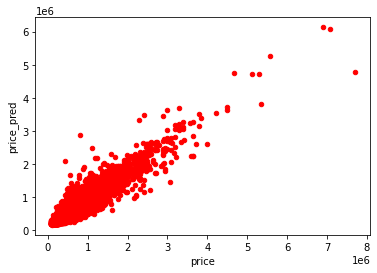

In [21]:
sales.plot.scatter(x='price',y='price_pred',color='red')